In [1]:
import os
import shutil
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from random import sample
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Cuenta el número de imágenes que hay por cada categoría

imag_1_hoja = 0
imag_2_hojas = 0
imag_3_hojas = 0
imag_4_hojas = 0
imag_5_hojas = 0
imag_6_hojas = 0
imag_9_hojas = 0
dir1 = "C:/Users/ferga/Documents/Python/hojas/1"
dir2 = "C:/Users/ferga/Documents/Python/hojas/2"
dir3 = "C:/Users/ferga/Documents/Python/hojas/3"
dir4 = "C:/Users/ferga/Documents/Python/hojas/4"
dir5 = "C:/Users/ferga/Documents/Python/hojas/5"
dir6 = "C:/Users/ferga/Documents/Python/hojas/6"
dir9 = "C:/Users/ferga/Documents/Python/hojas/9+"
for path in os.listdir(dir1):
    if os.path.isfile(os.path.join(dir1, path)):
        imag_1_hoja += 1
for path in os.listdir(dir2):
    if os.path.isfile(os.path.join(dir2, path)):
        imag_2_hojas += 1
for path in os.listdir(dir3):
    if os.path.isfile(os.path.join(dir3, path)):
        imag_3_hojas += 1
for path in os.listdir(dir4):
    if os.path.isfile(os.path.join(dir4, path)):
        imag_4_hojas += 1
for path in os.listdir(dir5):
    if os.path.isfile(os.path.join(dir5, path)):
        imag_5_hojas += 1
for path in os.listdir(dir6):
    if os.path.isfile(os.path.join(dir6, path)):
        imag_6_hojas += 1
for path in os.listdir(dir9):
    if os.path.isfile(os.path.join(dir9, path)):
        imag_9_hojas += 1
print('Imagenes de 1 hoja: '+ str(imag_1_hoja))
print('Imagenes de 2 hojas: '+ str(imag_2_hojas))
print('Imagenes de 3 hojas: '+ str(imag_3_hojas))
print('Imagenes de 4 hojas: '+ str(imag_4_hojas))
print('Imagenes de 5 hojas: '+ str(imag_5_hojas))
print('Imagenes de 6 hojas: '+ str(imag_6_hojas))
print('Imagenes de 9 hojas: '+ str(imag_9_hojas))
print('Total: ', imag_1_hoja+imag_2_hojas+imag_3_hojas+imag_4_hojas+imag_5_hojas+imag_6_hojas+imag_9_hojas)


Imagenes de 1 hoja: 908
Imagenes de 2 hojas: 3292
Imagenes de 3 hojas: 940
Imagenes de 4 hojas: 2082
Imagenes de 5 hojas: 601
Imagenes de 6 hojas: 650
Imagenes de 9 hojas: 570
Total:  9043


In [3]:
imag_1_hoja = 570
imag_2_hojas = 570
imag_3_hojas = 570
imag_4_hojas = 570
imag_5_hojas = 570
imag_6_hojas = 570
imag_9_hojas = 570

In [4]:
#Cuenta cuantas imágenes servirán para train, para validation y para test, en este caso se ha seguido el criterio 80%-10%-10% respectivamente.

n_imag_train_1 = round(imag_1_hoja*0.8)
n_imag_validation_1 = imag_1_hoja//10
n_imag_test_1 = imag_1_hoja-n_imag_train_1-n_imag_validation_1
print('1 hoja: Train=' + str(n_imag_train_1) + ' Validation=' + str(n_imag_validation_1) + ' Test=' + str(n_imag_test_1))
n_imag_train_2 = round(imag_2_hojas*0.8)
n_imag_validation_2 = imag_2_hojas//10
n_imag_test_2 = imag_2_hojas-n_imag_train_2-n_imag_validation_2
print('2 hojas: Train=' + str(n_imag_train_2) + ' Validation=' + str(n_imag_validation_2) + ' Test=' + str(n_imag_test_2))
n_imag_train_3 = round(imag_3_hojas*0.8)
n_imag_validation_3 = imag_3_hojas//10
n_imag_test_3 = imag_3_hojas-n_imag_train_3-n_imag_validation_3
print('3 hojas: Train=' + str(n_imag_train_3) + ' Validation=' + str(n_imag_validation_3) + ' Test=' + str(n_imag_test_3))
n_imag_train_4 = round(imag_4_hojas*0.8)
n_imag_validation_4 = imag_4_hojas//10
n_imag_test_4 = imag_4_hojas-n_imag_train_4-n_imag_validation_4
print('4 hojas: Train=' + str(n_imag_train_4) + ' Validation=' + str(n_imag_validation_4) + ' Test=' + str(n_imag_test_4))
n_imag_train_5 = round(imag_5_hojas*0.8)
n_imag_validation_5 = imag_5_hojas//10
n_imag_test_5 = imag_5_hojas-n_imag_train_5-n_imag_validation_5
print('5 hojas: Train=' + str(n_imag_train_5) + ' Validation=' + str(n_imag_validation_5) + ' Test=' + str(n_imag_test_5))
n_imag_train_6 = round(imag_6_hojas*0.8)
n_imag_validation_6 = imag_6_hojas//10
n_imag_test_6 = imag_6_hojas-n_imag_train_6-n_imag_validation_6
print('6 hojas: Train=' + str(n_imag_train_6) + ' Validation=' + str(n_imag_validation_6) + ' Test=' + str(n_imag_test_6))
n_imag_train_9 = round(imag_9_hojas*0.8)
n_imag_validation_9 = imag_9_hojas//10
n_imag_test_9 = imag_9_hojas-n_imag_train_9-n_imag_validation_9
print('9 hojas: Train=' + str(n_imag_train_9) + ' Validation=' + str(n_imag_validation_9) + ' Test=' + str(n_imag_test_9))

1 hoja: Train=456 Validation=57 Test=57
2 hojas: Train=456 Validation=57 Test=57
3 hojas: Train=456 Validation=57 Test=57
4 hojas: Train=456 Validation=57 Test=57
5 hojas: Train=456 Validation=57 Test=57
6 hojas: Train=456 Validation=57 Test=57
9 hojas: Train=456 Validation=57 Test=57


In [6]:
#Asignamos cada ruta a variables que luego serán necesarias.

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

## Directorio con las imagenes de train
# 1 hoja.
train_weed1_dir = os.path.join(train_dir, '1')
# 2 hojas.
train_weed2_dir = os.path.join(train_dir, '2')
# 3 hojas.
train_weed3_dir = os.path.join(train_dir, '3')
# 4 hojas.
train_weed4_dir = os.path.join(train_dir, '4')
# 5 hojas.
train_weed5_dir = os.path.join(train_dir, '5')
# 6 hojas.
train_weed6_dir = os.path.join(train_dir, '6')
# 7 hojas.
train_weed7_dir = os.path.join(train_dir, '7')
# 8 hojas.
train_weed8_dir = os.path.join(train_dir, '8')
# 9 hojas o más.
train_weed9plus_dir = os.path.join(train_dir, '9+')

## Directorio con las imagenes de validation
# 1 hoja
validation_weed1_dir = os.path.join(validation_dir, '1')
# 2 hojas
validation_weed2_dir = os.path.join(validation_dir, '2')
# 3 hojas
validation_weed3_dir = os.path.join(validation_dir, '3')
# 4 hojas
validation_weed4_dir = os.path.join(validation_dir, '4')
# 5 hojas
validation_weed5_dir = os.path.join(validation_dir, '5')
# 6 hojas
validation_weed6_dir = os.path.join(validation_dir, '6')
# 7 hojas
validation_weed7_dir = os.path.join(validation_dir, '7')
# 8 hojas
validation_weed8_dir = os.path.join(validation_dir, '8')
# 9 hojas o más
validation_weed9plus_dir = os.path.join(validation_dir, '9+')

## Directorio con las imagenes de test
# 1 hoja
test_weed1_dir = os.path.join(test_dir,'1')
# 2 hojas
test_weed2_dir = os.path.join(test_dir,'2')
# 3 hojas
test_weed3_dir = os.path.join(test_dir,'3')
# 4 hojas
test_weed4_dir = os.path.join(test_dir,'4')
# 5 hojas
test_weed5_dir = os.path.join(test_dir,'5')
# 6 hojas
test_weed6_dir = os.path.join(test_dir,'6')
# 7 hojas
test_weed7_dir = os.path.join(test_dir,'7')
# 8 hojas
test_weed8_dir = os.path.join(test_dir,'8')
# 9 hojas o más
test_weed9plus_dir = os.path.join(test_dir,'9+')


In [7]:
# Ordena cada foto en su respectiva carpeta de train, test o validation

# 1 hoja
contenido_1 = os.listdir(dir1)
contenido_1_random = sample(contenido_1, 570)
for i in range(len(contenido_1_random)):
    if i < n_imag_train_1:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), train_weed1_dir)
    elif i >= n_imag_train_1 and i < n_imag_train_1+n_imag_validation_1:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), validation_weed1_dir)
    else:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), test_weed1_dir)
# 2 hojas
contenido_2 = os.listdir(dir2)
contenido_2_random = sample(contenido_2, 570)
for i in range(len(contenido_2_random)):
    if i < n_imag_train_2:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), train_weed2_dir)
    elif i >= n_imag_train_2 and i < n_imag_train_2+n_imag_validation_2:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), validation_weed2_dir)
    else:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), test_weed2_dir)
# 3 hojas
contenido_3 = os.listdir(dir3)
contenido_3_random = sample(contenido_3, 570)
for i in range(len(contenido_3_random)):
    if i < n_imag_train_3:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), train_weed3_dir)
    elif i >= n_imag_train_3 and i < n_imag_train_3+n_imag_validation_3:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), validation_weed3_dir)
    else:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), test_weed3_dir)
# 4 hojas
contenido_4 = os.listdir(dir4)
contenido_4_random = sample(contenido_4, 570)
for i in range(len(contenido_4_random)):
    if i < n_imag_train_4:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), train_weed4_dir)
    elif i >= n_imag_train_4 and i < n_imag_train_4+n_imag_validation_4:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), validation_weed4_dir)
    else:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), test_weed4_dir)
# 5 hojas
contenido_5 = os.listdir(dir5)
contenido_5_random = sample(contenido_5, 570)
for i in range(len(contenido_5_random)):
    if i < n_imag_train_5:
        shutil.copy(os.path.join(dir5, contenido_5_random[i]), train_weed5_dir)
    elif i >= n_imag_train_5 and i < n_imag_train_5+n_imag_validation_5:
        shutil.copy(os.path.join(dir5, contenido_5_random[i]), validation_weed5_dir)
    else:
        shutil.copy(os.path.join(dir5, contenido_5_random[i]), test_weed5_dir)
# 6 hojas
contenido_6 = os.listdir(dir6)
contenido_6_random = sample(contenido_6, 570)
for i in range(len(contenido_6_random)):
    if i < n_imag_train_6:
        shutil.copy(os.path.join(dir6, contenido_6_random[i]), train_weed6_dir)
    elif i >= n_imag_train_6 and i < n_imag_train_6+n_imag_validation_6:
        shutil.copy(os.path.join(dir6, contenido_6_random[i]), validation_weed6_dir)
    else:
        shutil.copy(os.path.join(dir6, contenido_6_random[i]), test_weed6_dir)
# 9 hojas
contenido_9 = os.listdir(dir9)
contenido_9_random = sample(contenido_9, 570)
for i in range(len(contenido_9_random)):
    if i < n_imag_train_9:
        shutil.copy(os.path.join(dir9, contenido_9_random[i]), train_weed9plus_dir)
    elif i >= n_imag_train_9 and i < n_imag_train_9+n_imag_validation_9:
        shutil.copy(os.path.join(dir9, contenido_9_random[i]), validation_weed9plus_dir)
    else:
        shutil.copy(os.path.join(dir9, contenido_9_random[i]), test_weed9plus_dir)

In [8]:
# Pequeña comprobación de que las fotos están bien ordenadas

#Train
train_weed1_fnames = os.listdir( train_weed1_dir )
print(train_weed1_fnames[:5])
train_weed2_fnames = os.listdir( train_weed2_dir )
print(train_weed2_fnames[:5])
train_weed3_fnames = os.listdir( train_weed3_dir )
print(train_weed3_fnames[:5])
train_weed4_fnames = os.listdir( train_weed4_dir )
print(train_weed4_fnames[:5])
train_weed5_fnames = os.listdir( train_weed5_dir )
print(train_weed5_fnames[:5])
train_weed6_fnames = os.listdir( train_weed6_dir )
print(train_weed6_fnames[:5])
train_weed9plus_fnames = os.listdir( train_weed9plus_dir )
print(train_weed9plus_fnames[:5])

['0.png', '10.png', '101.png', '107.png', '110.png']
['1.png', '100.png', '1001.png', '1002.png', '1011.png']
['1.png', '101.png', '103.png', '107.png', '108.png']
['0.png', '1002.png', '1011.png', '1013.png', '1017.png']
['0.png', '10.png', '101.png', '102.png', '103.png']
['0.png', '1.png', '10.png', '101.png', '104.png']
['0.png', '1.png', '10.png', '100.png', '101.png']


In [9]:
#Comprueba el numero de fotos que hay en cada directorio para verificar que se ha realizado el reparto correctamente

print('total training weed1 images :', len(os.listdir(train_weed1_dir ) ))
print('total training weed2 images :', len(os.listdir(train_weed2_dir ) ))
print('total training weed3 images :', len(os.listdir(train_weed3_dir ) ))
print('total training weed4 images :', len(os.listdir(train_weed4_dir ) ))
print('total training weed5 images :', len(os.listdir(train_weed5_dir ) ))
print('total training weed6 images :', len(os.listdir(train_weed6_dir ) ))
print('total training weed9plus images :', len(os.listdir(train_weed9plus_dir ) ))

print('total validation weed1 images :', len(os.listdir( validation_weed1_dir ) ))
print('total validation weed2 images :', len(os.listdir( validation_weed2_dir ) ))
print('total validation weed3 images :', len(os.listdir( validation_weed3_dir ) ))
print('total validation weed4 images :', len(os.listdir( validation_weed4_dir ) ))
print('total validation weed5 images :', len(os.listdir( validation_weed5_dir ) ))
print('total validation weed6 images :', len(os.listdir( validation_weed6_dir ) ))
print('total validation weed9plus images :', len(os.listdir( validation_weed9plus_dir ) ))

print('total test weed1 images :', len(os.listdir( test_weed1_dir ) ))
print('total test weed2 images :', len(os.listdir( test_weed2_dir ) ))
print('total test weed3 images :', len(os.listdir( test_weed3_dir ) ))
print('total test weed4 images :', len(os.listdir( test_weed4_dir ) ))
print('total test weed5 images :', len(os.listdir( test_weed5_dir ) ))
print('total test weed6 images :', len(os.listdir( test_weed6_dir ) ))
print('total test weed9plus images :', len(os.listdir( test_weed9plus_dir ) ))

total training weed1 images : 456
total training weed2 images : 456
total training weed3 images : 456
total training weed4 images : 456
total training weed5 images : 456
total training weed6 images : 456
total training weed9plus images : 456
total validation weed1 images : 57
total validation weed2 images : 57
total validation weed3 images : 57
total validation weed4 images : 57
total validation weed5 images : 57
total validation weed6 images : 57
total validation weed9plus images : 57
total test weed1 images : 57
total test weed2 images : 57
total test weed3 images : 57
total test weed4 images : 57
total test weed5 images : 57
total test weed6 images : 57
total test weed9plus images : 57


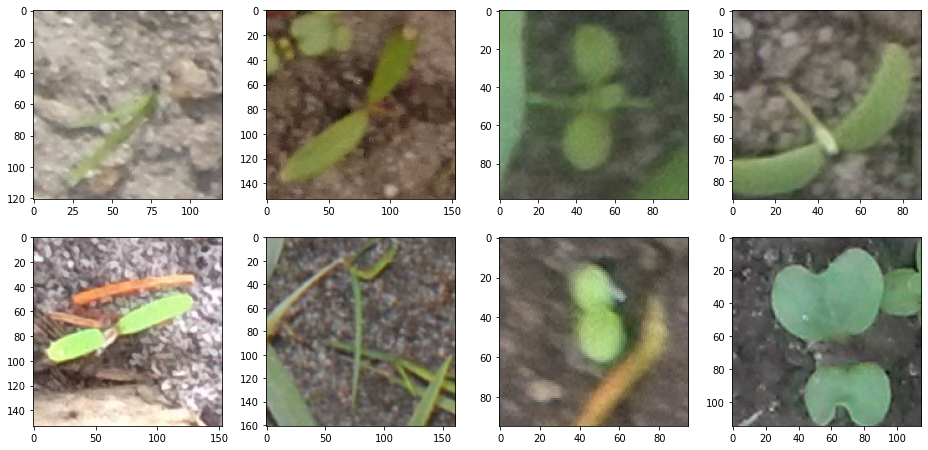

In [10]:
# Representa un ejemplo de las imágenes que se van a tomar para resolver el problema. En este caso se representarán las de dos hojas

# presentaremos images en una configuración de 4x4
nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_weed_pix = [os.path.join(train_weed2_dir, fname) 
                for fname in train_weed2_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_weed_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [11]:
#Creación de la CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255.,
      rotation_range=60,
      horizontal_flip=True,
      vertical_flip=True,
      brightness_range=[0.5,1.5],
      fill_mode='nearest'
      )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [15]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         shuffle=False,
                                                         batch_size=32,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 3192 images belonging to 7 classes.
Found 399 images belonging to 7 classes.
Found 399 images belonging to 7 classes.


In [16]:
batch_size = 32
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

99
12


In [17]:
history = model.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=125,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/125
99/99 [==============================] - 53s 387ms/step - loss: 1.9449 - accuracy: 0.1551 - val_loss: 1.9440 - val_accuracy: 0.1771
Epoch 2/125
99/99 [==============================] - 28s 278ms/step - loss: 1.9414 - accuracy: 0.1589 - val_loss: 1.9412 - val_accuracy: 0.2240
Epoch 3/125
99/99 [==============================] - 28s 282ms/step - loss: 1.9378 - accuracy: 0.1946 - val_loss: 1.9364 - val_accuracy: 0.2734
Epoch 4/125
99/99 [==============================] - 28s 283ms/step - loss: 1.9295 - accuracy: 0.2310 - val_loss: 1.9238 - val_accuracy: 0.2734
Epoch 5/125
99/99 [==============================] - 28s 279ms/step - loss: 1.9116 - accuracy: 0.2547 - val_loss: 1.8956 - val_accuracy: 0.2526
Epoch 6/125
99/99 [==============================] - 28s 281ms/step - loss: 1.8686 - accuracy: 0.2570 - val_loss: 1.8590 - val_accuracy: 0.2135
Epoch 7/125
99/99 [==============================] - 29s 294ms/step - loss: 1.8428 - accuracy: 0.2358 - val_loss: 1.7892 - val_accuracy:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

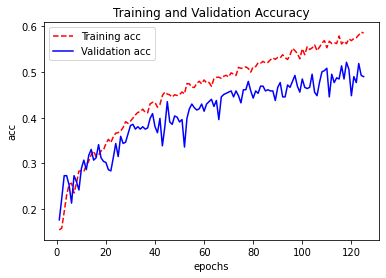

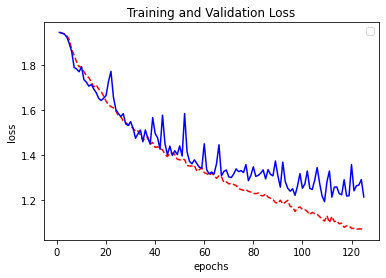

<Figure size 432x288 with 0 Axes>

In [19]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [20]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

13/13 [==============================] - 3s 213ms/step - loss: 1.1132 - accuracy: 0.5363
Test Accuracy: 0.5363408327102661


In [18]:
# Save the model
model.save('Contador_de_hojas_vequal.h5')

Confusion Matrix


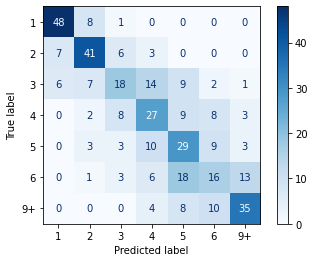

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.84      0.81        57
           2       0.66      0.72      0.69        57
           3       0.46      0.32      0.37        57
           4       0.42      0.47      0.45        57
           5       0.40      0.51      0.45        57
           6       0.36      0.28      0.31        57
          9+       0.64      0.61      0.62        57

    accuracy                           0.54       399
   macro avg       0.53      0.54      0.53       399
weighted avg       0.53      0.54      0.53       399



In [21]:
# Confusion Matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['1', '2','3','4','5','6','9+']
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))